# Lab 9: Document Analysis

In this assignment, we will learn how to do document classification and clustering



## 1. Example

In this example, we use [20newsgroups](https://scikit-learn.org/stable/datasets/real_world.html#newsgroups-dataset) dataset. Each sample is a document and there are totally 20 classes. 

### 1.1 Load data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups

data_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
data_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

print("Train data target labels: {}".format(data_train.target))
print("Train data target names: {}".format(data_train.target_names))

print('#training samples: {}'.format(len(data_train.data)))
print('#testing samples: {}'.format(len(data_test.data)))


Train data target labels: [7 4 4 ... 3 1 8]
Train data target names: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
#training samples: 11314
#testing samples: 7532


### 1.2 Represent documents with TF-IDF represention

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler


#TF-IDF representation for each document
vectorizer = TfidfVectorizer()
data_train_vectors = vectorizer.fit_transform(data_train.data)
data_test_vectors = vectorizer.transform(data_test.data) 

print(data_train_vectors.shape, data_test_vectors.shape)


(11314, 101631) (7532, 101631)


### 1.3 Use KNN to do document classification

Here, we use the cross-validation method to select $K$.

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score


Xtr = data_train_vectors
Ytr = data_train.target

Xte = data_test_vectors
Yte = data_test.target

k_range = range(1, 5)
param_grid = dict(n_neighbors=k_range)

clf_knn =  KNeighborsClassifier(n_neighbors=1)

grid = GridSearchCV(clf_knn, param_grid, cv=5, scoring='accuracy')
grid.fit(Xtr, Ytr)

print(grid.best_score_)
print(grid.best_params_)

0.16846385009722467
{'n_neighbors': 1}


### 1.4 Use Logistic Regression to do document classification
Here, we also use the cross-validation method to select the regularization coefficient. 

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np

#=====training with cross validation======
coeff = range(1, 10)
param_grid = dict(C=coeff)

clf_lr = LogisticRegression(penalty='l2')

grid = GridSearchCV(clf_lr, param_grid, cv=5, scoring='accuracy')
grid.fit(Xtr, Ytr)

print(grid.best_params_)

#=====testing======
clf_lr = LogisticRegression(penalty='l2', C=grid.best_params_['C'])
clf_lr.fit(Xtr, Ytr)

y_pred = clf_lr.predict(Xte)

acc = accuracy_score(Yte, y_pred)
macro_f1 = f1_score(Yte, y_pred, average='macro')
micro_f1 = f1_score(Yte, y_pred, average='micro')

print(acc, macro_f1, micro_f1)

/Users/ghc/Software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ghc/Software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


{'C': 8}
0.6889272437599575 0.6778761181105242 0.6889272437599575


## 2. Task: Document Classification and Clustering

In this task, we are going to use [BBCNews](BBC_News_Train.csv) dataset. There are 1490 articles from 5 topics, including tech, business, sport, entertainment, politics. 

* Task 1: Please use KNN and logistic regression to do classification, and compare their performance.

* Task 2: Please use K-means to partition this dataset into 5 clusters and find the representative words in each cluster. 

### 2.1 Load data and represent it with TF-IDF representation

In [11]:
# your code
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("BBC_News_Train.csv")
print(df.isnull().sum())
print(df.info())

target = df['Category'].values
text_feature = df['Text'].values

X_train_val, X_test, y_train_val, y_test = train_test_split(text_feature, target, 
                                                            test_size=0.40, 
                                                            random_state=0)

vectorizer = TfidfVectorizer()
data_train_vectors = vectorizer.fit_transform(X_train_val)
data_test_vectors = vectorizer.transform(X_test) 
print(data_train_vectors.shape, data_test_vectors.shape)

ArticleId    0
Text         0
Category     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB
None
(894, 19889) (596, 19889)


### 2.2 Use KNN to do document classification

In [6]:
# your code
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score


Xtr = data_train_vectors
Ytr = y_train_val

Xte = data_test_vectors
Yte = y_test

k_range = range(1, 5)
param_grid = dict(n_neighbors=k_range)

clf_knn =  KNeighborsClassifier(n_neighbors=1)

grid = GridSearchCV(clf_knn, param_grid, cv=5, scoring='accuracy')
grid.fit(Xtr, Ytr)

print("Best score: {} & Best parameter: {}".format(grid.best_score_, grid.best_params_))

y_pred = grid.predict(Xte)
acc = accuracy_score(Yte, y_pred)
macro_f1 = f1_score(Yte, y_pred, average='macro')
micro_f1 = f1_score(Yte, y_pred, average='micro')
print("Testing.......")
print("Accuracy: {}\nMacro_f1 score: {}\nMicro_f1 score: {}".format(acc, macro_f1, micro_f1))

Best score: 0.9026865859017011 & Best parameter: {'n_neighbors': 4}
Testing.......
Accuracy: 0.9161073825503355
Macro_f1 score: 0.9148881898200958
Micro_f1 score: 0.9161073825503355


### 2.3 Use Logistic Regression to do document classification

In [7]:
# your code
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np

#=====training with cross validation======
coeff = range(1, 10)
param_grid = dict(C=coeff)

clf_lr = LogisticRegression(penalty='l2')

grid = GridSearchCV(clf_lr, param_grid, cv=5, scoring='accuracy')
grid.fit(Xtr, Ytr)

print("Best parameter: {}".format(grid.best_params_))

#=====testing======
clf_lr = LogisticRegression(penalty='l2', C=grid.best_params_['C'])
clf_lr.fit(Xtr, Ytr)

y_pred = clf_lr.predict(Xte)

acc = accuracy_score(Yte, y_pred)
macro_f1 = f1_score(Yte, y_pred, average='macro')
micro_f1 = f1_score(Yte, y_pred, average='micro')

print("Testing.......")
print("Accuracy: {}\nMacro_f1 score: {}\nMicro_f1 score: {}".format(acc, macro_f1, micro_f1))

Best parameter: {'C': 7}
Testing.......
Accuracy: 0.9714765100671141
Macro_f1 score: 0.9711034409941053
Micro_f1 score: 0.9714765100671141


### 2.4 Use K-means to do document clustering and find the 10 most representative words in each cluster. 

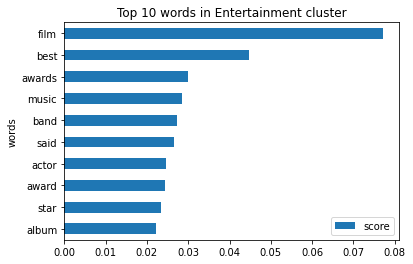

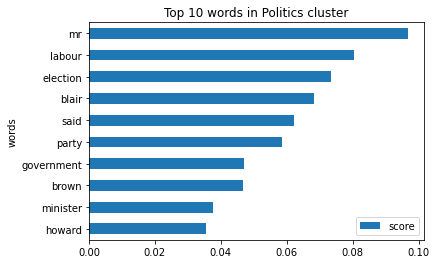

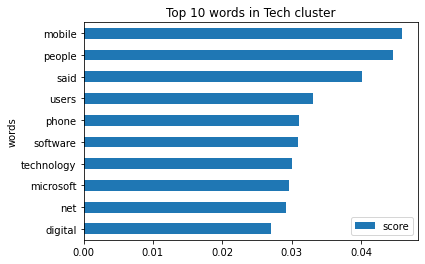

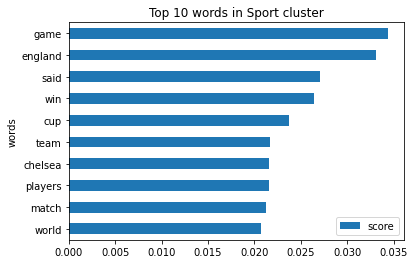

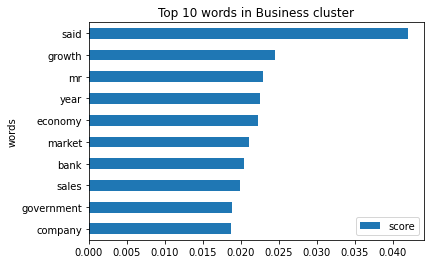

In [10]:
# your code
from sklearn.cluster import KMeans

# Topic, Cluster_label_number
# Entertainment, 0
# Politics, 1
# Tech, 2
# Sport, 3
# Business, 4
df = pd.read_csv('BBC_News_Train.csv')
topics = df['Category'].values
texts = df['Text'].values

vectorizer = TfidfVectorizer(stop_words='english')
data_vectors = vectorizer.fit_transform(texts)
x = data_vectors
kmeans = KMeans(n_clusters=5, random_state=0).fit(x)
clusters = kmeans.labels_

title_list = ['Entertainment', 'Politics', 'Tech', 'Sport', 'Business']
for i in range(5):
    chart_title = "Top 10 words in "+title_list[i]+" cluster"
    data_index = np.where(clusters == i)
    data_indices = np.mean(data_vectors[data_index], axis=0)
    data_indices = np.array(data_indices).ravel()
    sorted_means = np.argsort(data_indices)[::-1][:10]
    features = vectorizer.get_feature_names()
    best_features = [(features[i], data_indices[i]) for i in sorted_means]
    df = pd.DataFrame(best_features, columns=['words', 'score'])
    ax = df.plot.barh(x='words', y='score', title = chart_title)
    ax.invert_yaxis()
